<a href="https://colab.research.google.com/github/Hafidzh11/Tugas-Besar-Kecerdasan/blob/main/klasifikasi_penyakit_jantung_dengan_decission_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE

In [4]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


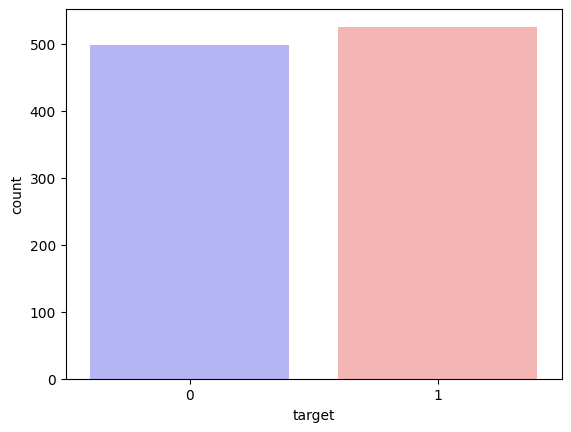

In [5]:
df.target.value_counts()
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [6]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Persentase pasien tidak memiliki penyakit jantung: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Persentasi pasien memiliki penyakit jantung: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Persentase pasien tidak memiliki penyakit jantung: 48.68%
Persentasi pasien memiliki penyakit jantung: 51.32%


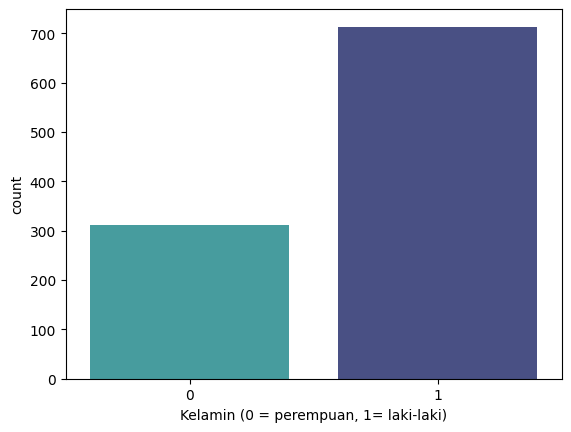

In [7]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Kelamin (0 = perempuan, 1= laki-laki)")
plt.show()

In [8]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Persentase pasien perempuan: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Persentase pasien laki-laki: {:.2f}%".format((countMale / (len(df.sex))*100)))

Persentase pasien perempuan: 30.44%
Persentase pasien laki-laki: 69.56%


In [9]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


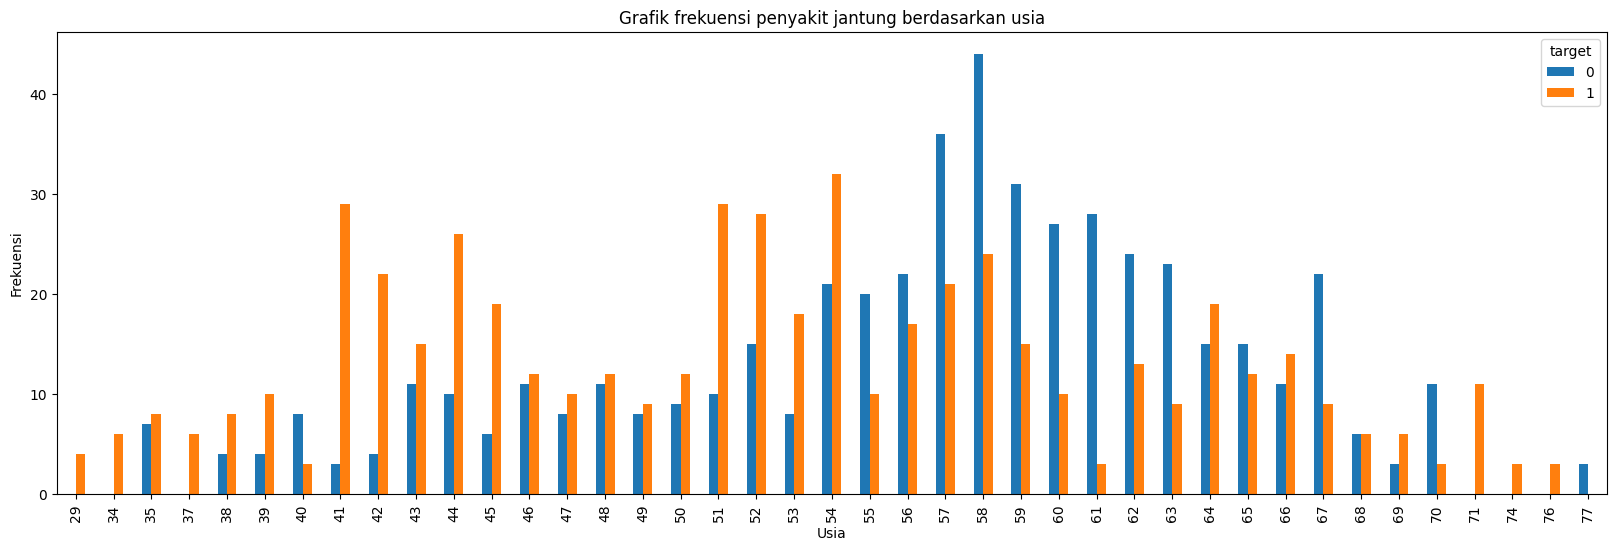

In [10]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Grafik frekuensi penyakit jantung berdasarkan usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.savefig('PenyakitJantungDanUmur.png')
plt.show()

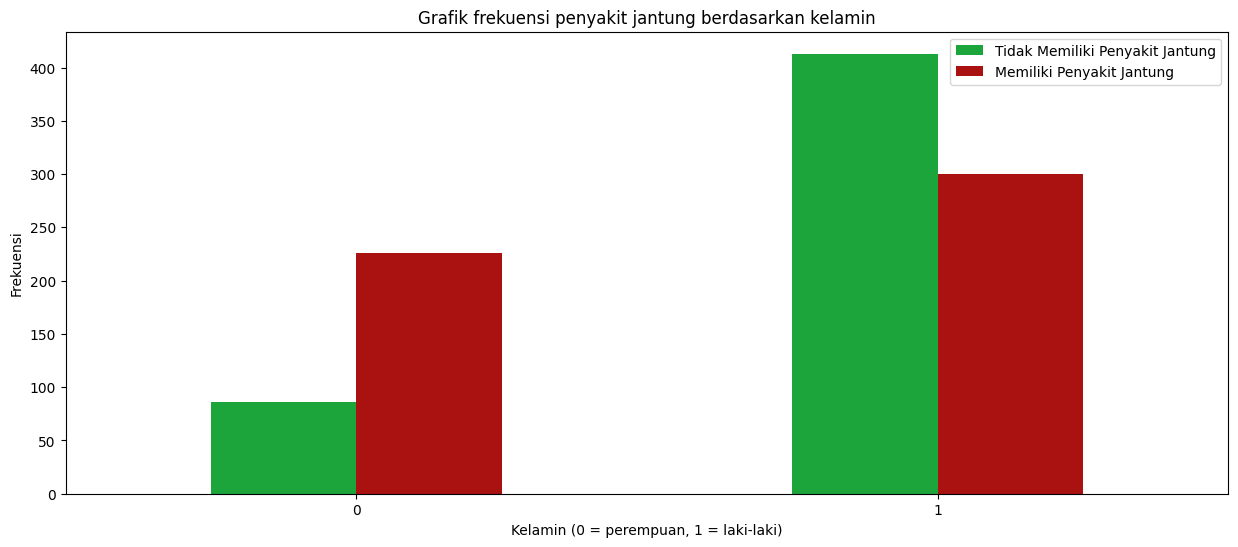

In [11]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Grafik frekuensi penyakit jantung berdasarkan kelamin')
plt.xlabel('Kelamin (0 = perempuan, 1 = laki-laki)')
plt.xticks(rotation=0)
plt.legend(["Tidak Memiliki Penyakit Jantung", "Memiliki Penyakit Jantung"])
plt.ylabel('Frekuensi')
plt.show()

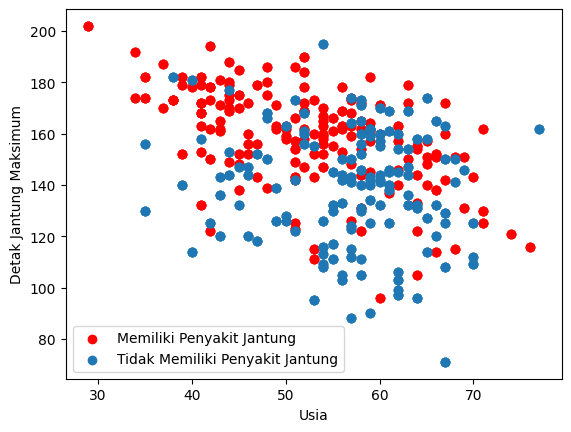

In [12]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Memiliki Penyakit Jantung", "Tidak Memiliki Penyakit Jantung"])
plt.xlabel("Usia")
plt.ylabel("Detak Jantung Maksimum")
plt.show()

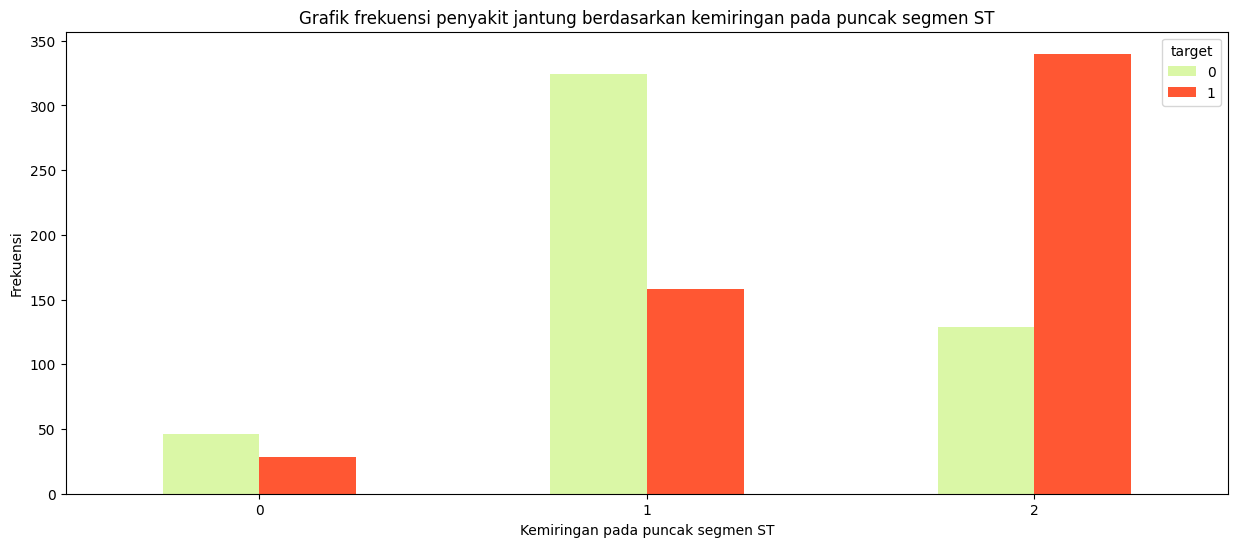

In [13]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Grafik frekuensi penyakit jantung berdasarkan kemiringan pada puncak segmen ST')
plt.xlabel('Kemiringan pada puncak segmen ST')
plt.xticks(rotation = 0)
plt.ylabel('Frekuensi')
plt.show()

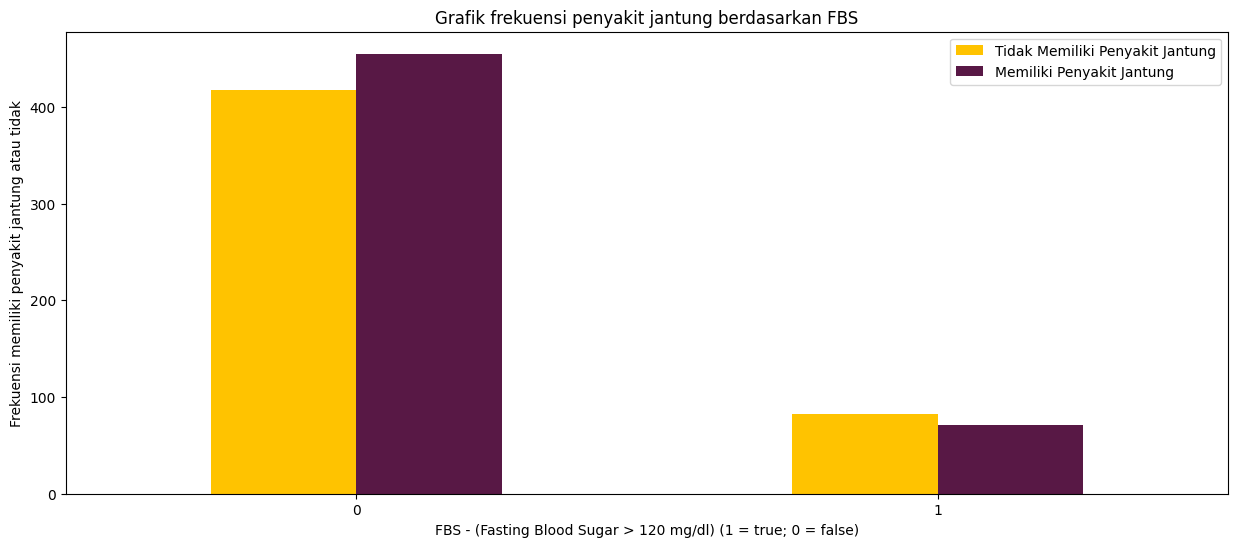

In [14]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Grafik frekuensi penyakit jantung berdasarkan FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Tidak Memiliki Penyakit Jantung", "Memiliki Penyakit Jantung"])
plt.ylabel('Frekuensi memiliki penyakit jantung atau tidak')
plt.show()

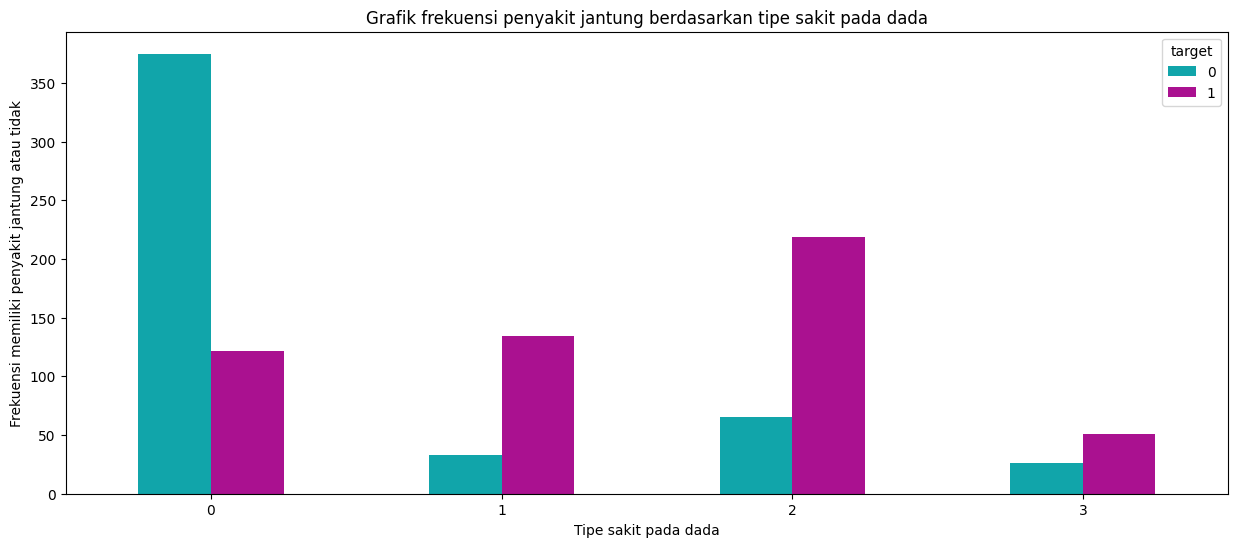

In [15]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Grafik frekuensi penyakit jantung berdasarkan tipe sakit pada dada')
plt.xlabel('Tipe sakit pada dada')
plt.xticks(rotation = 0)
plt.ylabel('Frekuensi memiliki penyakit jantung atau tidak')
plt.show()

In [16]:
scaler = MinMaxScaler()

normalized_array = scaler.fit_transform(df[['sex','chol','fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']])
normalized_df = pd.DataFrame(normalized_array, columns=['sex','chol','fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

df[['sex','chol','fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']] = normalized_df

In [27]:
df.corr()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [18]:
X = df.drop(['target'], axis = 1).values 
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [19]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

In [20]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[ 98,   0],
       [  0, 107]])

In [21]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall/Sensitivity: ", metrics.recall_score(y_test, y_pred))

Accuracy:  1.0
Precision:  1.0
Recall/Sensitivity:  1.0


In [22]:
smote = SMOTE(random_state = 45)

s_X_train, s_y_train =smote.fit_resample(X_train,y_train)
s_X_test, s_y_test = smote.fit_resample(X_test,y_test)

In [23]:
s_dt = DecisionTreeClassifier()

s_dt.fit(s_X_train, s_y_train)

s_y_pred = dt.predict(s_X_test)

In [24]:
s_cnf_matrix = metrics.confusion_matrix(s_y_test, s_y_pred)

s_cnf_matrix

array([[107,   0],
       [  0, 107]])

In [25]:
print("Accuracy: ", metrics.accuracy_score(s_y_test, s_y_pred))
print("Precision: ", metrics.precision_score(s_y_test, s_y_pred))
print("Recall/Sensitivity: ", metrics.recall_score(s_y_test, s_y_pred))

Accuracy:  1.0
Precision:  1.0
Recall/Sensitivity:  1.0
